### **Resultados TRM**

Text(-0.35, 0.925, 'Estimaciones Propias v.s 4448.93')

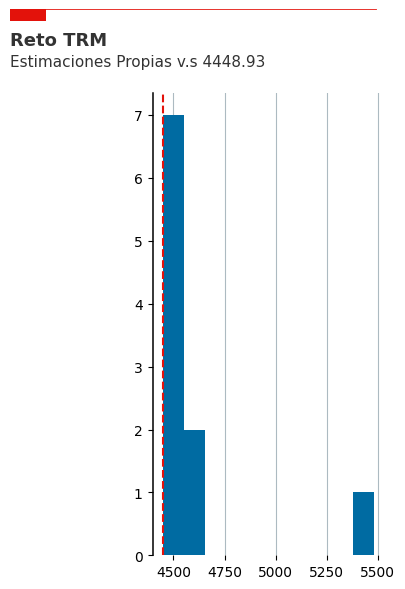

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes our plots higher resolution
plt.rcParams['figure.dpi'] = 100
student=['jesus','alex','Andres','Natali','Camilo','Javier','Catalina','Kevin','Monica','Andres H']
estimate=[4536.33,4610,4449,4470,4531.8,5484,4654.88,4466,4526,4545.86]
gender=['M','M','M','F','M','M','F','M','F','M']
# dictionary of lists 
dict = {'student': student, 'estimate': estimate, 'gender': gender} 
    
df = pd.DataFrame(dict)

# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

#ax2 = ax.twinx()
# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
#gdp['country'] = gdp['country'].replace('the United States', 'United States')
gdp_bar = df["estimate"]
# Plot data
ax.hist(df['estimate'], color='#006BA2', zorder=2)
ax.axvline(x=4448.93, color='#E3120B', linestyle='--', label='Vertical Line')
# Reformat x-axis tick labels
        # Lower tick labels a bit

# Add in line and tag
ax.plot([-.35, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)

ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="Reto TRM", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="Estimaciones Propias v.s 4448.93", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)




### 1. **Probit y Logit**

### 1.1 **Modelos para resultados binarios**

Pasaremos a modelar ahora situaciones donde buscamos un indicador o conocer si un resultado se ha dado. Modelaremos entonces probabilidades usando herramientas econometricas para hacer proposiciones probabilisticas acerca de la ocurrencia de estos eventos. 

Así, estos modelos a estudiar son inherentemente e intrinsecamente no lineales. Empezaremos así con resultados binarios. Estos modelos  relacionan un resultado a un conjunto de factores. Nuestra aproximación buscará analizar cada uno de ellos en el marco general de un modelo de probabilidad:

$Prob(\text{event j occurs | x}) = Prob(Y = j | x) = F(\text{relevant effects, parameters, x})$

$Prob(Y = 1| x) = \text{Probability that event of interest occurs}| x$,

y, naturalmente, $Prob(Y = 0| x) = [1 - Prob(Y = 1| x)]$ es la probabilidad de que el evento no ocurra. 

$$Prob(Y = 1| x) =\int_{-\infty }^{x'B}\phi(t)\mathrm{d} t=\Phi(x'B)$$

La pregunta de qué distribución utilizar es natural. La distribución logística es similar a la normal excepto en las colas, que son considerablemente más pesadas. (Se asemeja más a una distribución t con siete grados de libertad). Para valores intermedios de xB, las dos distribuciones tienden a dar probabilidades muy similares. La distribución logística tiende a dar probabilidades más altas a Y = 1 cuando xB es extremadamente pequeño (y probabilidades más bajas a Y = 1 cuando xB es muy grande) que la distribución normal. 

Sin embargo, es difícil proporcionar generalidades prácticas en esta base, ya que requerirían conocimiento de B. Podríamos esperar diferentes predicciones de los dos modelos si la muestra contiene (1) muy pocas respuestas (Y iguales a 1) o muy pocas no respuestas (Y iguales a 0) y (2) una variación muy amplia en una variable independiente importante, especialmente si (1) también es cierto. Existen razones prácticas para favorecer uno u otro en algunos casos por conveniencia matemática, pero es difícil justificar la elección de una distribución u otra en términos teóricos. Amemiya (1981) discute varios problemas relacionados, pero como proposición general, la pregunta queda sin resolver. En la mayoría de las aplicaciones, la elección entre estas dos parece no tener mucha diferencia.

#### 1.2 Datos

Tenemos información  de incumplimiento y cinco variables para la predicción de incumplimiento: Capital de Trabajo (**WC**, por sus siglas en inglés), Ganancias Retenidas (**RE**), Ganancias antes de intereses e impuestos (**EBIT**, por sus siglas en inglés) y Ventas (**S**), cada una dividida por Activos Totales (**TA**); y el Valor de Mercado del Patrimonio (**ME**, por sus siglas en inglés) dividido por Pasivos Totales (**TL**).

Excepto por el valor de mercado, todos estos elementos se encuentran en el balance general y estado de resultados de la empresa. El valor de mercado se obtiene multiplicando el número de acciones en circulación por el precio de la acción.

Las cinco razones pertenecen al   reconocido Z-score desarrollado por Altman (1968). **WC/TA** captura la liquidez a corto plazo de una empresa, **RE/TA** y **EBIT/TA** miden la rentabilidad histórica y actual, respectivamente. **S/TA** también refleja la situación competitiva de la empresa y **ME/TL** es una medida basada en el mercado del apalancamiento.

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [11]:
df = pd.read_csv('USCorporateDefault.csv')
df = df.dropna()
print(df.shape)
print(list(df.columns))

(4000, 8)
['Firm ID', 'Year', 'Default', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']


In [12]:
df.head()

,Firm ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,3723,2012,1,0.24,0.06,0.03,1.83,0.27
1,1252,2014,0,0.42,-0.06,0.00,1.28,0.18
2,2188,2020,0,0.34,0.28,0.04,0.27,0.26
3,514,2014,0,0.09,0.20,0.05,0.94,0.14
4,3489,2014,0,0.19,-0.11,0.01,0.85,0.08


In [13]:
df.drop(['Firm ID','Year'], axis=1, inplace=True)

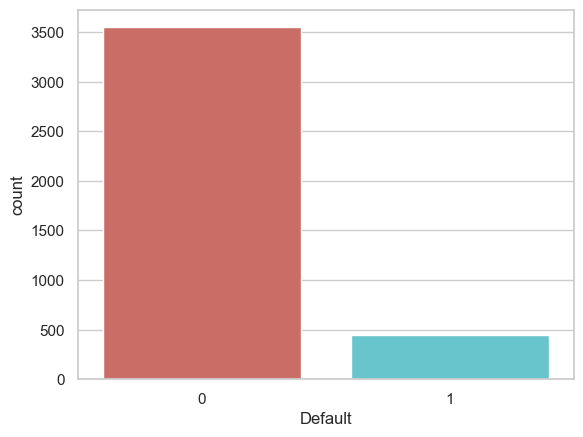

In [14]:
sns.countplot(x='Default', data=df, palette='hls')
plt.show()

Nuestras clases estas desbalanceadas, un problema que debemos corregir si queremos evitar las siguientes consecuencias:

1. Sesgo en la predicción: Cuando las clases están desbalanceadas, el modelo tiende a tener un sesgo hacia la clase mayoritaria. Esto se debe a que el modelo busca maximizar su rendimiento general y puede lograr una alta precisión simplemente prediciendo siempre la clase mayoritaria. Como resultado, la clase minoritaria puede ser subestimada o mal clasificada.

2. Rendimiento engañoso: Las métricas de rendimiento como la precisión pueden ser engañosas en el caso de clases desbalanceadas. Por ejemplo, si el 95% de las instancias pertenecen a la clase A y el 5% a la clase B, un modelo que prediga siempre la clase A tendrá una precisión del 95%. Sin embargo, este modelo no está aprendiendo nada útil sobre la clase minoritaria B.

3. Baja detección de la clase minoritaria: Debido al desequilibrio de clases, el modelo puede tener dificultades para detectar correctamente la clase minoritaria. Esto es especialmente problemático si la clase minoritaria es la que tiene más relevancia o interés en el problema que se está abordando. El modelo puede pasar por alto patrones importantes o tomar decisiones incorrectas sobre la clase minoritaria debido a la falta de ejemplos para aprender.

4. Sobreajuste en la clase mayoritaria: El modelo puede sobreajustarse a la clase mayoritaria debido a la falta de ejemplos de la clase minoritaria. Esto puede llevar a una mayor sensibilidad a los errores en la clase mayoritaria y una generalización deficiente en la clase minoritaria.



Antes de corregir nuestro problema de desbalance veamos unos datos exploratorios adicionales

In [15]:
df.groupby('Default').mean()

,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
Default,,,,,
0,0.215500,0.100138,0.025365,0.689276,0.208755
1,0.220443,-0.020710,0.034745,1.597406,0.201441


+ El ratio promedio **WC/TA** (es decir, Capital de Trabajo dividido por Activos Totales) para las empresas que incurrieron en incumplimiento es casi igual a la de las empresas que no lo hicieron.
  
+ El ratio promedio **RE/TA** (es decir, Ganancias Retenidas dividido por Activos Totales) para las empresas que incurrieron en incumplimiento es más baja que la de las empresas que no lo hicieron.
  
+ El ratio promedio **EBIT/TA** (es decir, Ganancias antes de intereses e impuestos dividido por Activos Totales) para las empresas que incurrieron en incumplimiento es un poco más alta que la de las empresas que no lo hicieron.
  
+ El ratio promedio **ME/TL** (es decir, Valor de Mercado del Patrimonio dividido por Pasivos Totales) para las empresas que incurrieron en incumplimiento es más alta (más del doble) que la de las empresas que no lo hicieron.
  
+ El ratio promedio **S/TA** (es decir, Ventas dividido por Activos Totales) para las empresas que incurrieron en incumplimiento es casi igual a la de las empresas que no lo hicieron.

In [17]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 1.3 Sobre muestreo Oversampling

Con nuestros datos de entrenamiento creados, vamos a aumentar la clase de incumplimiento utilizando el algoritmo SMOTE (Técnica de Sobremuestreo de la Minoría Sintética). A grandes rasgos, SMOTE funciona creando muestras sintéticas de la clase minoritaria (incumplimiento) en lugar de crear copias.
Elige aleatoriamente uno de los k-vecinos más cercanos y lo utiliza para crear observaciones nuevas similares, pero ajustadas aleatoriamente.

In [19]:
X = df.loc[:, df.columns != 'Default']
y = df.loc[:, df.columns == 'Default']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# we can Check the numbers of our data
print('length of oversampled data is ',len(os_data_X))
print('Number of no default in oversampled data',len(os_data_y[os_data_y['Default']==0]))
print('Number of default',len(os_data_y[os_data_y['Default']==1]))
print('Proportion of no default data in oversampled data is',len(os_data_y[os_data_y['Default']==0])/len(os_data_X))
print('Proportion of default data in oversampled data is ',len(os_data_y[os_data_y['Default']==1])/len(os_data_X))

length of oversampled data is  4756
Number of no default in oversampled data 2378
Number of default 2378
Proportion of no default data in oversampled data is 0.5
Proportion of default data in oversampled data is  0.5


In [47]:
import statsmodels.api as smf
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt



cols=['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA'] 

X=os_data_X[cols]
y=os_data_y['Default']


probit_model=smf.Probit(y,X)
result=probit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.394853
         Iterations 7
                        Results: Probit
Model:              Probit           Method:           MLE      
Dependent Variable: Default          Pseudo R-squared: 0.430    
Date:               2023-05-25 15:19 AIC:              3765.8387
No. Observations:   4756             BIC:              3798.1745
Df Model:           4                Log-Likelihood:   -1877.9  
Df Residuals:       4751             LL-Null:          -3296.6  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     7.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
WC/TA       -0.6559    0.1492   -4.3961  0.0000  -0.9484  -0.3635
RE/TA       -7.5378    0.2742  -27.4858  0.0000  -8.0753  -7.0003
EBIT/TA 

Predicted    0    1
Actual             
0          893  278
1           24  125


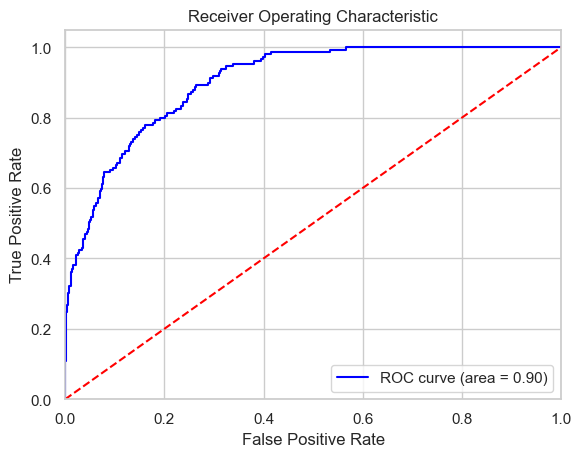

In [48]:
# Predict the probabilities
y_pred_prob = result.predict(X_test)

# Convert probabilities to binary predictions
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# Confusion matrix
confusion_matrix = pd.crosstab(y_test["Default"].values.reshape(-1,), y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test["Default"].values.reshape(-1,), y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


La curva ROC (Receiver Operating Characteristic) es una herramienta utilizada para evaluar y visualizar el desempeño de un modelo de clasificación binaria. Proporciona información sobre la capacidad del modelo para distinguir entre las dos clases (por ejemplo, clase positiva y clase negativa).

En términos simples, la curva ROC muestra cómo cambia la tasa de verdaderos positivos (sensibilidad) en función de la tasa de falsos positivos (1 - especificidad) a medida que se ajusta el umbral de clasificación del modelo.

La curva ROC se dibuja trazando diferentes puntos en un gráfico. En el eje x, tienes la tasa de falsos positivos (1 - especificidad), que representa el porcentaje de casos negativos incorrectamente clasificados como positivos. En el eje y, tienes la tasa de verdaderos positivos (sensibilidad), que representa el porcentaje de casos positivos correctamente clasificados como positivos.

Idealmente, deseas que la curva ROC se acerque lo más posible a la esquina superior izquierda del gráfico, lo que indica una alta sensibilidad y una baja tasa de falsos positivos. Un área bajo la curva (AUC) de 1.0 representa un modelo perfecto, mientras que un AUC de 0.5 indica un rendimiento aleatorio (sin capacidad de discriminación).



In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86      1171
           1       0.31      0.84      0.45       149

    accuracy                           0.77      1320
   macro avg       0.64      0.80      0.65      1320
weighted avg       0.90      0.77      0.81      1320



### 2. **Survival analisis (Analisis de Supervivencia)**

El análisis de supervivencia es una técnica estadística que se utiliza para analizar el tiempo hasta que ocurre un evento, como la muerte, el fracaso de un dispositivo o la recuperación de una enfermedad. En lugar de enfocarse en la probabilidad de que ocurra un evento en un momento específico, el análisis de supervivencia se centra en el tiempo que transcurre antes de que ocurra ese evento.

Uno de los modelos más populares utilizados en el análisis de supervivencia es el modelo de riesgos proporcionales de Cox. Este modelo asume que el efecto de las variables predictoras (como la edad, el sexo o el tratamiento) sobre el tiempo de supervivencia es constante a lo largo del tiempo. En otras palabras, el modelo supone que la relación entre las variables predictoras y la supervivencia es proporcional y no cambia con el tiempo.

Otro modelo comúnmente utilizado es el modelo paramétrico de regresión de riesgos proporcionales de Weibull. Este modelo asume que el riesgo de experimentar el evento de interés cambia con el tiempo de acuerdo con una función de distribución de Weibull. La forma de la función de distribución puede variar y se puede ajustar a los datos para obtener la mejor aproximación posible.

En cuanto a los supuestos del análisis de supervivencia, además del supuesto de proporcionalidad de riesgos del modelo de Cox, hay otros supuestos importantes. Uno de ellos es el supuesto de independencia censoring, que asume que la ocurrencia del evento de interés y la censorización (cuando los datos no están completamente observados) son independientes entre sí. Esto significa que la probabilidad de que un individuo experimente el evento de interés no debe verse afectada por si fue censorizado o no.

Otro supuesto es el supuesto de ausencia de sesgo de información, que implica que el censoramiento no debe estar relacionado con el valor real no observado del tiempo de supervivencia. Es decir, el censoramiento no debe estar influenciado por factores que puedan estar asociados con el evento de interés.

Estos son solo algunos de los conceptos básicos del análisis de supervivencia. Es una herramienta útil para estudiar el tiempo hasta que ocurren eventos y se utiliza en diversas áreas, como la medicina, la ingeniería y las ciencias sociales, para comprender mejor los factores que influyen en la supervivencia o el tiempo hasta que ocurra un evento.

#### **2.1 Algunas aplicaciones de survival analysis**

El análisis de supervivencia también tiene aplicaciones en el campo de las finanzas y la economía. Aquí te presento algunas de ellas:

1. **Default de préstamos**: El análisis de supervivencia puede utilizarse para analizar el tiempo hasta que los prestatarios incumplan en el pago de sus préstamos. Esto puede ayudar a las instituciones financieras a evaluar el riesgo crediticio y a establecer tasas de interés adecuadas.

2. **Quiebra de empresas**: El análisis de supervivencia puede aplicarse para modelar el tiempo hasta que una empresa quiebre. Esto permite a los analistas y a los inversionistas evaluar la solidez financiera de una empresa y anticipar su viabilidad en el futuro.

3. **Duración del desempleo**: En el ámbito económico, el análisis de supervivencia puede emplearse para estudiar la duración del desempleo de los individuos. Esto ayuda a comprender mejor las dinámicas del mercado laboral y a evaluar la efectividad de las políticas públicas de empleo.

4. **Estimación de tiempo hasta la absorción del mercado**: En el campo de la economía de la vivienda y bienes raíces, el análisis de supervivencia puede emplearse para modelar el tiempo que tarda en absorberse el inventario de viviendas en el mercado. Esto proporciona información valiosa sobre la oferta y demanda de viviendas y permite a los desarrolladores y agentes inmobiliarios tomar decisiones informadas.




#### **2.2 Definiciones**

El análisis de supervivencia se basa en la probabilidad de que el evento de interés no haya ocurrido en el tiempo t. Generalmente, se utiliza una función de supervivencia dependiente del tiempo $S(t)$ para representar esa probabilidad.

$$S(t) = P(T > t)$$

En otras palabras, $S(t)$ corresponde a la probabilidad de supervivencia después del tiempo $t$. Aquí, $T$ representa la duración aleatoria tomada de la población. Recuerde que $S(t)$ está entre cero y uno (inclusive) y es una función decreciente de t.

#### Hazard Function (Funcion de Riesgo)

La función de riesgo, también conocida como función hazard, se define como la probabilidad de que un individuo experimente un evento de interés dentro de un pequeño intervalo de tiempo, siempre y cuando el individuo haya sobrevivido hasta el comienzo de ese intervalo. Es la tasa instantánea calculada durante un período de tiempo y se considera constante. También se puede considerar como el riesgo de experimentar el evento de interés en el tiempo $t$. Es el número de sujetos que experimentan un evento en el intervalo que comienza en el tiempo $t$, dividido por el producto del número de sujetos que sobreviven en el tiempo $t$ y el ancho del intervalo. Dado que la probabilidad de que una variable aleatoria continua sea igual a un valor particular es cero, consideramos la probabilidad de que el evento ocurra en un intervalo particular de tiempo desde $T$ hasta $(T+\Delta T)$. Dado que nuestro objetivo es encontrar el riesgo de un evento y no queremos que el riesgo aumente a medida que el intervalo de tiempo ΔT se hace más grande, dividimos la ecuación por ΔT. Esto escala la ecuación por $\Delta T$. La ecuación de la función de riesgo se expresa como:

$$h(t)=\lim_{\delta t  \to 0 }=\frac{P(t<T\leq t+\delta t|T>t)}{\delta t}$$

El límite $\Delta T$ que se acerca a cero implica que nuestro objetivo es medir el riesgo de que ocurra un evento en un punto particular en el tiempo. Por lo tanto, tomar el límite $\Delta T$  que se acerca a cero resulta en un período de tiempo infinitesimalmente pequeño. Es importante destacar que el riesgo no es una probabilidad. Esto se debe a que, aunque tenemos la probabilidad en el numerador, el $\Delta T$  en el denominador podría dar como resultado un valor mayor que uno.

#### Datos Censurados

Los datos se consideran  censurados cuando la información sobre su tiempo de supervivencia es incompleta. Esto ocurre cuando el sujeto ya no es observado antes de experimentar el evento de interés. Esto puede ser debido al final del período de observación o a la aparición de otro evento que impide la observación del evento de interés. En un contexto de seguros, el abandono conduce a información censurada cuando el evento de interés es cualquier riesgo de mortalidad/morbilidad. Se le llama datos censurados a la derecha. También existen la censura a la izquierda, el censurado por intervalos y la truncación a la izquierda, pero solo trabajaremos con datos censurados a la derecha. Por ejemplo, se dice que alguien que abandona el estudio antes de que termine el tiempo de observación del estudio y no experimenta el evento está censurado a la derecha.

<p><img alt="censored data" width="450" height="280" src="censored.png"
" align="center" hspace="10px" vspace="0px"></p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
#import lifelines # for survival analysis
from sklearn.preprocessing import LabelEncoder

In [ ]:
#!pip install lifelines

In [3]:
df = pd.read_csv('./ibm_data.csv', sep=',')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Veamos un analisis de las distintas variables categoricas

summary_categorical = []
for column in df.columns:
  if df[column].dtype == object:
    summary_categorical.append(column)
    print(df[column].value_counts())
    print(f"----------------------------------")

summary_numerical = []
for column in df.columns:
  if df[column].dtype != object:
    print(f"{column} : Minimum: {min((df[column].unique()))}, Maximum: {max((df[column].unique()))} ")
    summary_numerical.append(column)
    print(f"----------------------------------")

No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------
Male      882
Female    588
Name: Gender, dtype: int64
----------------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: 

In [5]:
# Convertimos la variable de desercion en una varaible binaria

encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])

#### 2.3 **Estimador de kaplan meier**
El estimador de Kaplan-Meier se utiliza para estimar la función de supervivencia. Mide la fracción de sujetos que sobreviven durante un cierto período de tiempo de supervivencia  $t$.

La representación visual de esta función generalmente se llama curva de Kaplan-Meier. Muestra la probabilidad de un evento en un cierto intervalo de tiempo (por ejemplo, supervivencia). Si el tamaño de la muestra es lo suficientemente grande, la curva debería acercarse a la verdadera función de supervivencia para la población estudiada. La probabilidad de supervivencia en un momento particular se calcula como el número de sujetos que sobreviven dividido por el número de personas en riesgo. Los sujetos censurados no se cuentan en el denominador. La ecuación se presenta de la siguiente manera:

$$S(t)=\prod_{ti,t} \frac{n{i}-d_{i}}{n_{i}}$$

donde $n_{i}$ representa el número de sujetos en riesgo antes del tiempo $t$ y $d_{i}$ representa el número de eventos de interés en el tiempo $t$.

<Axes: xlabel='timeline'>

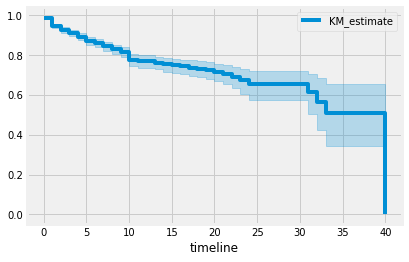

In [10]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df['YearsAtCompany'], event_observed=df['Attrition'])
kmf.plot(ci_show=True)

El eje y representa la probabilidad de que el sujeto aún no haya experimentado el evento de interés después de un tiempo  $t$, donde el tiempo $t$  se encuentra en el eje x. Para ver qué tan inciertas son nuestras estimaciones puntuales, utilizamos los intervalos de confianza. El tiempo mediano es el momento en el que, en promedio, la mitad de la población ha experimentado el evento de interés.

In [9]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.989116
1.0,0.948192
2.0,0.927792
3.0,0.911342
4.0,0.894026
5.0,0.872931
6.0,0.861611
7.0,0.846275
8.0,0.831850


### 2.4 Funcion de supervivencia de diferentes grupos

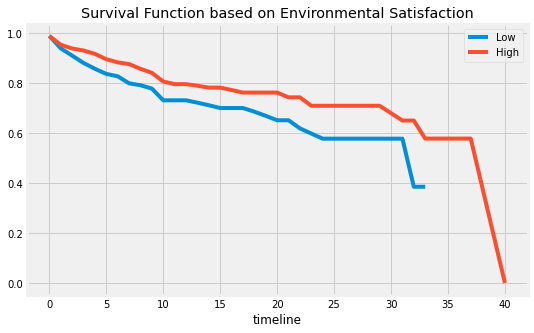

In [11]:

EnvironmentalLow = ((df['EnvironmentSatisfaction'] == 1) | (df['EnvironmentSatisfaction'] == 2))
EnvironmentalHigh = ((df['EnvironmentSatisfaction'] == 3) | (df['EnvironmentSatisfaction'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[EnvironmentalLow]['YearsAtCompany'], 
        event_observed=df[EnvironmentalLow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[EnvironmentalHigh]['YearsAtCompany'], 
        event_observed=df[EnvironmentalHigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function Satisfaccion con el entorno')
plt.show()

Vemos que casi para cualquier t, la probabilidad de supervivencia es menor para aquellos empleados que manifiestan satisfaccion baja con su entorno

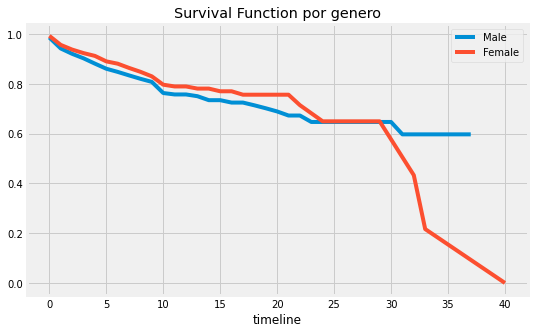

In [13]:

male = (df ['Gender'] == 'Male')
female = (df['Gender'] == 'Female')

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[male]['YearsAtCompany'], event_observed=df[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=df[female]['YearsAtCompany'], event_observed=df[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function por genero')
plt.show();

#### 2.5 Modelo de Riesgos  Proporcionales de Cox



#### Regresión de supervivencia
La regresión de supervivencia no solo implica el uso de la variable de duración y de censura, sino también el uso de características adicionales como covariables. Regresamos estas covariables contra la variable de duración. Al igual que con otras técnicas de regresión, es necesario preparar los datos antes de introducirlos en el modelo.

#### Modelo de Cox

El Modelo de Cox  tiene en cuenta el efecto de varias variables al mismo tiempo y examina la relación de la distribución de supervivencia con estas variables. Es similar al Análisis de Regresión Múltiple, pero la diferencia es que la variable dependiente es la función de riesgo en un momento dado $t$. Se basa en intervalos de tiempo muy pequeños, que contienen como máximo un evento de interés. Es un enfoque semiparamétrico para la estimación de pesos en un Modelo de Riesgos Proporcionales. Las estimaciones de los parámetros se obtienen maximizando la verosimilitud parcial de los pesos. Se utiliza el gradiente descendiente el Modelo de Cox a los datos. El modelo funciona de tal manera que el log-riesgo de un sujeto individual es una función lineal de sus covariables estáticas y una función de riesgo base a nivel de población que cambia con el tiempo. Estas covariables se pueden estimar mediante la verosimilitud parcial.

$$h(t|x)=b_{0}(t)\textup{exp}\Sigma_{i=1}^{n}b_{i}x_{i}$$

+ $t$ representa el tiempo de supervivencia, el riesgo puede variar con el tiempo.
+ $h(t)$ es la función de riesgo determinada por un conjunto de $n$ covariables $(x1, x2, ..., xn)$.
+ $b_{0}(t)$ es la función de riesgo base y se define como la probabilidad de experimentar el evento de interés cuando todas las demás covariables son iguales a cero, es decir, el valor del riesgo si todas las $x_{i}$ son iguales a cero (la cantidad $exp(0)$ es igual a 1). Es el único componente dependiente del tiempo en el modelo. El modelo no hace ninguna suposición sobre la función de riesgo base y asume una forma paramétrica para el efecto de las covariables en el riesgo.
+ $\textup{exp}\Sigma_{i=1}^{n}b_{i}(x_i)$ es el riesgo parcial, un factor escalar invariante en el tiempo que solo aumenta o disminuye el riesgo base. Es similar al intercepto en la regresión ordinaria. Las covariables o los coeficientes de regresión $x$ proporcionan el cambio proporcional que se puede esperar en el riesgo.
+ los coeficientes $(b1, b2, ..., bn)$  miden el impacto de las covariables.

El signo de los coeficientes de regresión, $b_{i}$, juega un papel en el riesgo de un sujeto. Un cambio en estos coeficientes de regresión o covariables aumentará o disminuirá el riesgo base. Un signo positivo para $b_{i}$ significa que el riesgo de un evento es mayor y, por lo tanto, la probabilidad de que ocurra el evento de interés para ese sujeto en particular es mayor. De manera similar, un signo negativo significa que el riesgo del evento es menor. Estos coeficientes de regresión, $b$, se estiman maximizando la verosimilitud parcial.

El Modelo de Cox puede manejar datos con censura a la derecha, pero no puede manejar directamente datos con censura a la izquierda o intervalos de censura.

El Modelo de Cox se basa en tres suposiciones:

1. La razón de riesgos de dos sujetos permanece igual en todo momento.
2. Las variables explicativas actúan multiplicativamente sobre la función de riesgo.
3. Los tiempos de falla de los sujetos individuales son independientes entre sí.

In [14]:
columns_selected = ['Attrition',
                    'EnvironmentSatisfaction',
                    'JobInvolvement',
                    'JobLevel',
                    'JobSatisfaction',
                    'PercentSalaryHike',
                    'RelationshipSatisfaction',
                    'StockOptionLevel', 
                    'TrainingTimesLastYear', 
                    'YearsAtCompany'
                    ]
df = df[columns_selected]

In [15]:
from lifelines import CoxPHFitter 

#Creamos el modelo
coxph = CoxPHFitter()
#Fit de la data al modelo
coxph.fit(df, 
          duration_col='YearsAtCompany',
          event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [21]:
coxph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
EnvironmentSatisfaction,-0.235948,0.789821,0.059046,-0.351675,-0.120221,0.703508,0.886724,0.0,-3.996041,6.441070e-05,13.922340
JobInvolvement,-0.437262,0.645802,0.086134,-0.606082,-0.268443,0.545484,0.764569,0.0,-5.076526,3.843977e-07,21.310897
JobLevel,-1.015953,0.362057,0.094303,-1.200783,-0.831124,0.300958,0.435560,0.0,-10.773328,4.600640e-27,87.490224
JobSatisfaction,-0.215929,0.805793,0.057211,-0.328060,-0.103797,0.720319,0.901409,0.0,-3.774236,1.604987e-04,12.605151
PercentSalaryHike,-0.007789,0.992241,0.017730,-0.042539,0.026960,0.958353,1.027327,0.0,-0.439338,6.604164e-01,0.598552
RelationshipSatisfaction,-0.079339,0.923727,0.059333,-0.195630,0.036952,0.822316,1.037643,0.0,-1.337173,1.811660e-01,2.464615
StockOptionLevel,-0.423990,0.654430,0.091622,-0.603565,-0.244415,0.546858,0.783162,0.0,-4.627622,3.698882e-06,18.044479
TrainingTimesLastYear,-0.168396,0.845019,0.054939,-0.276074,-0.060717,0.758757,0.941089,0.0,-3.065140,2.175682e-03,8.844317


Interpretemos los resultados:
La columna exp(coef) contiene los hazard ratios (HR) los cuales indican que tanto cambio el riesgo de linea base debido a cambios de una unidad en el factor analizado. Por ejemplo, *enviromentSatisfaction*

+ hazard ratio = exp(coef) = 0.789
+ cambio en hazard = 0.79-1=-0.21 , un aumento de una unidad en satisfaccion laboral  implica una reduccion de 0.21 sobre el riesgo de linea base
+ cambio en tiempo de supervivencia: (1/0.79)-1=0.26, es decir un incremento de 26% en tiempo de supervivencia.


<Axes: xlabel='log(HR) (95% CI)'>

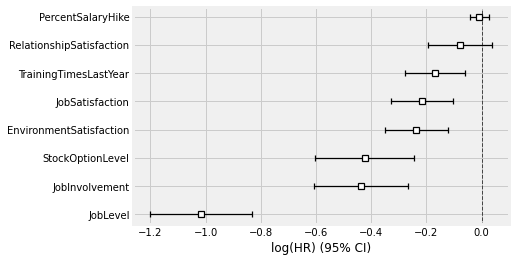

In [17]:
coxph.plot()

### Curvas de empleados particulares

In [22]:
empleados = [4,125,211]

rows_selected = df.iloc[empleados, :]
rows_selected

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany
4,0,1,3,1,2,12,4,1,3,2
125,0,3,2,1,2,19,3,0,3,5
211,0,3,2,3,3,22,3,0,2,11


<Axes: >

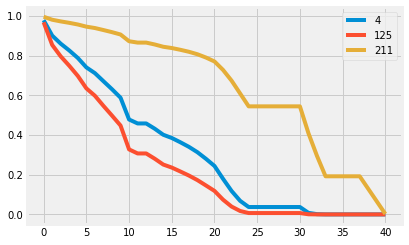

In [24]:
coxph.predict_survival_function(rows_selected).plot()

<Axes: >

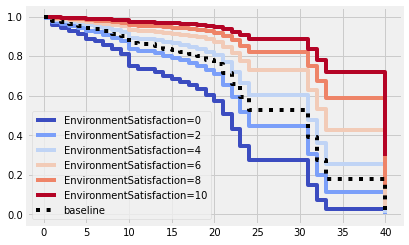

In [26]:
#efectos marginales
coxph.plot_partial_effects_on_outcome(covariates='EnvironmentSatisfaction', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')

### 3. **Score de Credito (Multiclass classification)**

Considere un dataset con las siguientes caracteristicas:
+ Age: Edad de la persona
+ Annual_Income: Renta anual de la persona
+ Monthly_Inhand_Salary: Salario base mensual
+ Num_Bank_Accounts: Cantidad de cuentas bancarias que posee la persona
+ Num_Credit_Card: Cantidad de tarjetas de credito que posee la persona
+ Interest_Rate: Tasa de interes vigente para tarjetas de credito
+ Num_of_Loan: Numero de prestamos vigentes tomados por la persona
+ Delay_from_due_date: Numero de dias promedio de retraso al efectuar pagos
+ Num_of_Delayed_Payment: Promedio de pagos mensuales retrasados
+ Changed_Credit_Limit: Cambio porcentual en el cupo de las tarjetas
+ Num_Credit_Inquiries: Numero de reclamos de tarjetas
+ Credit_Mix: Clasificacion del portafolio de creditos
+ Outstanding_Debt: Deuda a pagar
+ Credit_Utilization_Ratio: Ratio de utilizacion de la tarjeta de credito
+ Credit_History_Age: Edad de historial crediticio
+ Payment_of_Min_Amount: Binaria, indica si la persona pago el monto minimo solamente
+ Total_EMI_per_month: cuota mensual fija en dolares
+ Amount_invested_monthly: Insersiones mensuales hecas por la persona
+ Monthly_Balance: Blance mensual de la persona
+ Credit_Score: Credit Score de la persona (Poor, Standard, Good)

In [1]:
import numpy as np
import warnings
np.warnings = warnings
import pandas as pd
from scipy import stats as st
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import  CalibrationDisplay
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#import optuna
import json
#from optuna.visualization import plot_optimization_history
#from optuna.visualization import plot_parallel_coordinate
#from optuna.visualization import plot_param_importances
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

sns.set_style("darkgrid")



In [2]:


data=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/Score.csv")
X=data.drop("Credit_Score",axis=1)
y=data["Credit_Score"]

numeric=X.select_dtypes(exclude="object").columns
categorical=['Payment_of_Min_Amount', 'Credit_Mix']

low_cardinality=[col for col in numeric if data[col].nunique()<=30]
high_cardinality=[col for col in numeric if data[col].nunique()>30]


#### 3.1 Análisis Exploratorio de los Datos

([<matplotlib.patches.Wedge at 0x1916066d2d0>,
 [Text(-0.22995543576368635, 2.1879489248066863, 'Standard'),
  Text(-0.9571782015018224, -1.980860896320016, 'Poor'),
  Text(1.8699609717568793, -1.1589848851931024, 'Good')],
 [Text(-0.12543023768928344, 1.1934266862581924, '53.33%'),
  Text(-0.5220972008191759, -1.0804695798109176, '29.01%'),
  Text(1.0199787118673886, -0.6321735737416921, '17.66%')])

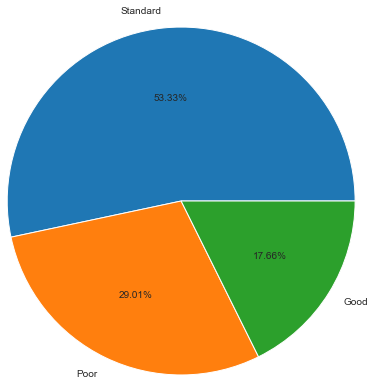

In [10]:
ser=data["Credit_Score"].value_counts()
plt.pie(x=ser.values, labels=ser.index, autopct="%0.2f%%", radius=2)

Existe una distribución desigual de clases en la variable objetivo, pero la diferencia de proporciones no es muy alta.

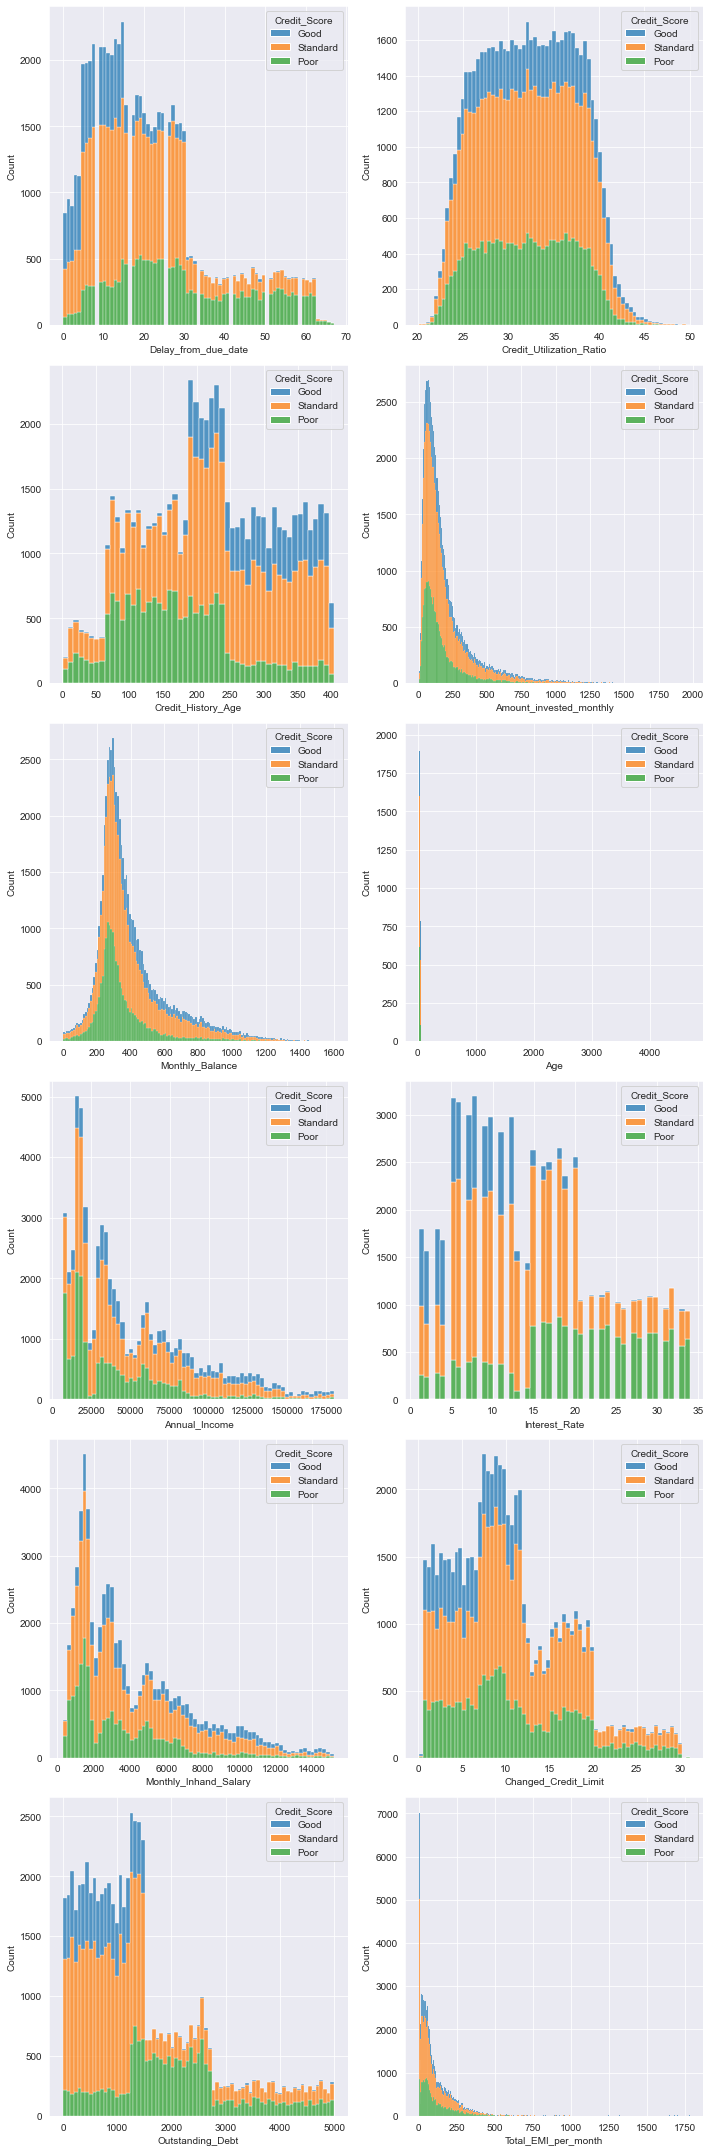

In [11]:
rows=[len(high_cardinality)//2 if len(high_cardinality)%2==0 else len(high_cardinality)//2+1]
fig,axes=plt.subplots(rows[0],2,figsize=(10,30))

ax=axes.flatten()
for i,col in enumerate(high_cardinality):
    sns.histplot(data=data,x=col,hue="Credit_Score",ax=ax[i],multiple="stack");
    
plt.tight_layout()

Vemos que para **Outstanding_Debt**,**Interest_Rate**,**Delay_from_due_date** Al aumentar los valores de esta variable  , la proporción de instancias de Mal Crédito (Bad Credit_Score) aumenta considerablemente, mientras que la proporción de instancias de Crédito Estándar (Standard) y Buen Crédito (Good Credit_Score) se vuelve escasa.

Por otro lado, el aumento en **Credit_History_Age** (Antigüedad del historial crediticio) y la **Edad** (Age) resulta en una disminución de las instancias de Mal Crédito (Bad Credit_Score) y un aumento en las instancias de Crédito Estándar (Standard) y Buen Crédito (Good Credit_Score).

Curiosamente, la relación de utilización de crédito (credit_utilization_ratio) parece tener la misma distribución para todas las categorías de puntaje de crédito.
La distribución de muchas características no sigue una distribución gaussiana y tiene escalas muy diferentes, por lo tanto, transformaremos las variables de características.

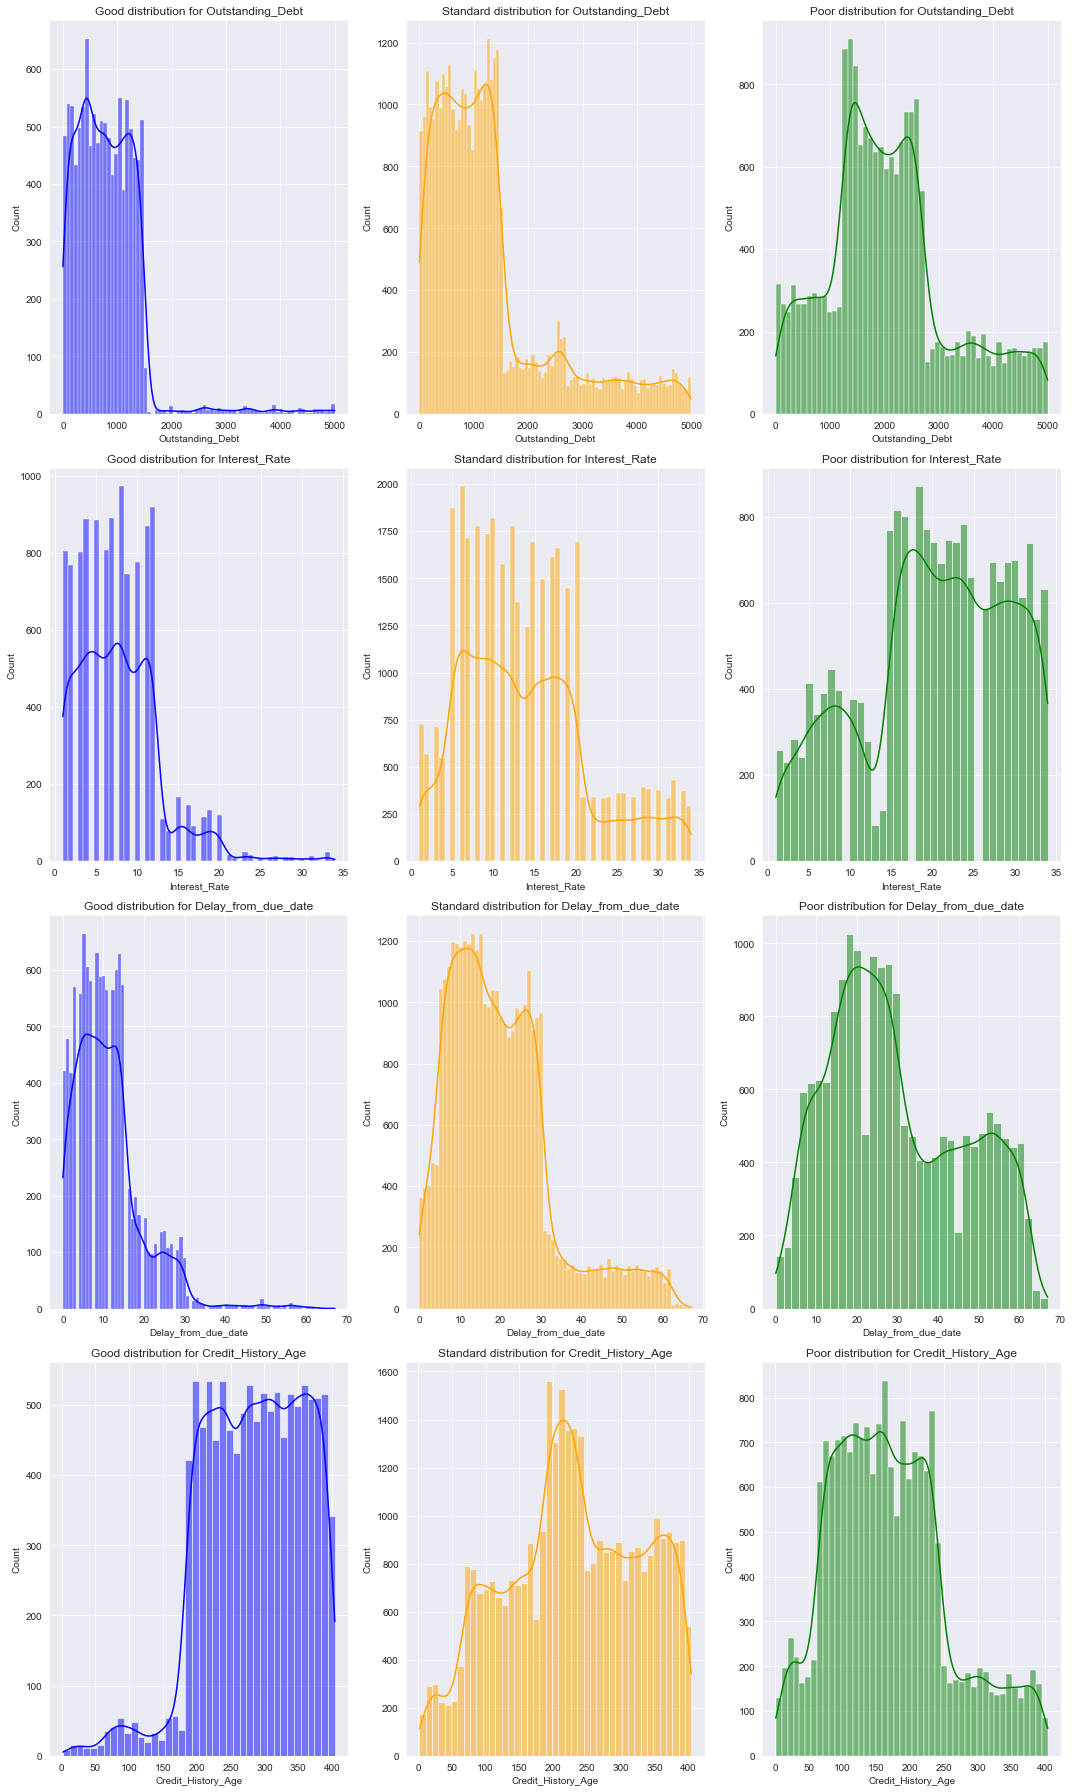

In [12]:
cols=["Outstanding_Debt", "Interest_Rate", "Delay_from_due_date", "Credit_History_Age"]
vals=["Good","Standard","Poor"]
colors=["blue","orange","green"]

fig,axes=plt.subplots(len(cols),3,figsize=(15,25))

for i,col in enumerate(cols):
    for j,(val,color) in enumerate(zip(vals,colors)):
        ax=axes[i,j]
        inter=data[data["Credit_Score"]==val]
        sns.histplot(data=inter,x=col,ax=ax,color=color,kde=True);
        ax.set_title(f"{val} distribution for {col}")
    
plt.tight_layout()

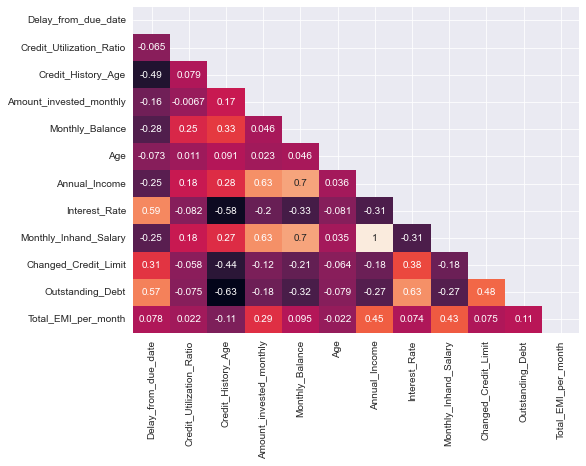

In [13]:
plt.figure(figsize=(8, 6))
arr=np.ones_like(data[high_cardinality].corr())
mask=np.triu(arr)
sns.heatmap(data[high_cardinality].corr(), cbar=False, annot=True, fmt=".2g", mask=mask);


Muchas variables tienen una fuerte correlación con otras, por ejemplo, **delay_from_due_date** tiene una fuerte correlación positiva con la tasa de interés cobrada (0.59), **outstanding_debt** (0.57) y una fuerte correlación negativa con **Credit_History_Age** (-0.49) y **Monthly_Inhand_Salary** (-0.25).

Así, una persona que ha tomado una gran suma de dinero a una tasa de interés alta con un salario bajo, disciplina financiera y ahorros escasos es más propensa a tener un alto número de pagos atrasados, buscar más crédito para pagar préstamos, lo que resulta en una tasa de interés alta y una deuda grande.



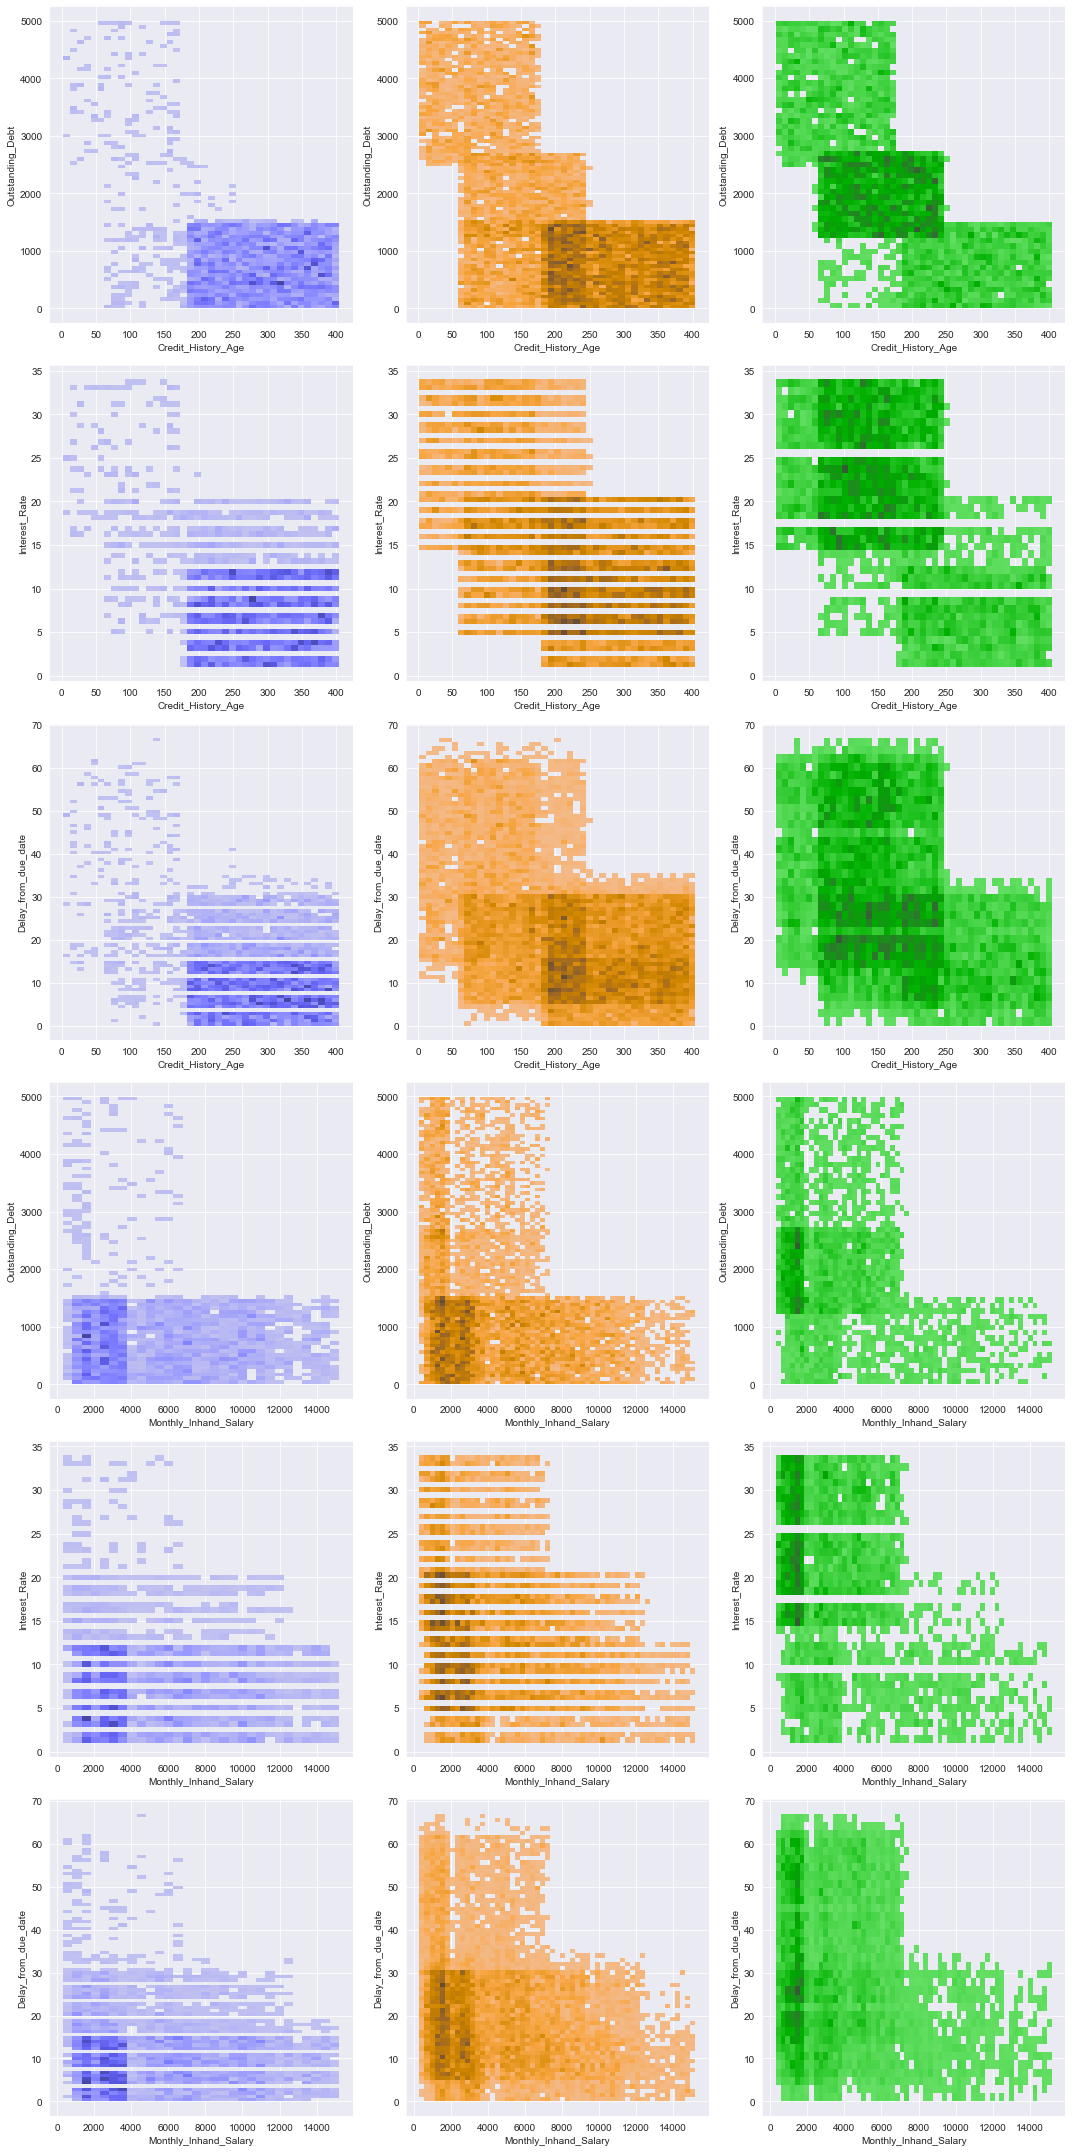

In [14]:
from itertools import product
arr1=["Credit_History_Age","Monthly_Inhand_Salary"]
arr2=["Outstanding_Debt","Interest_Rate","Delay_from_due_date"]

pairs=list(product(arr1,arr2))

fig,axes=plt.subplots(len(pairs),3,figsize=(15,30))

for i,(x,y) in enumerate(pairs):
    colors=["blue","orange","green"]
    vals=["Good","Standard","Poor"]
    for j,(color,val) in enumerate(zip(colors,vals)):
        ax=axes[i,j]
        inter=data[data["Credit_Score"]==val]
        sns.histplot(x=x,y=y,data=inter,color=color,ax=ax);
    
plt.tight_layout()

Estos gráficos muestran la distribución de densidad de las categorías de puntajes de crédito utilizando un análisis bivariado.
Las zonas de overlapping de instancias son lugares donde las instancias se clasifican incorrectamente en su mayoría. Dado esto, los métodos de aprendizaje basados en ensemble serán los más adecuados, mientras que los modelos lineales serán ineficaces debido a la presencia de relaciones complejas no lineales. Las SVM serán lentas debido al tamaño grande del conjunto de datos y al solapamiento de las instancias.

#### 3.3 Preprocesamiento de Datos

In [15]:
#label encoding target variable
label=LabelEncoder()
label.fit(data["Credit_Score"])
y=label.transform(data["Credit_Score"])

#transforming and scaling numerical variable
transformer=PowerTransformer()
transformer.fit(data[high_cardinality])
numeric=transformer.transform(data[high_cardinality])

#one hot encoding 
encoding=OneHotEncoder(drop="first")
encoding.fit(data[categorical])
one_hot=encoding.transform(data[categorical]).toarray()

#ordinal variables
ordinal=data[low_cardinality].values

#Feature array
X=np.concatenate([numeric,one_hot,ordinal],axis=1)

Definiendo el modelo

In [16]:
def get_models():
    names,models=[],[]
    
    models.append(RandomForestClassifier(random_state=42,n_jobs=-1))
    names.append("RandomForestClassifier")
    
    models.append(XGBClassifier(random_state=42,n_jobs=-1))
    names.append("XGBClassifier")
    
    models.append(LogisticRegression(random_state=42,n_jobs=-1))
    names.append("LogisticRegression")
    
    return names,models

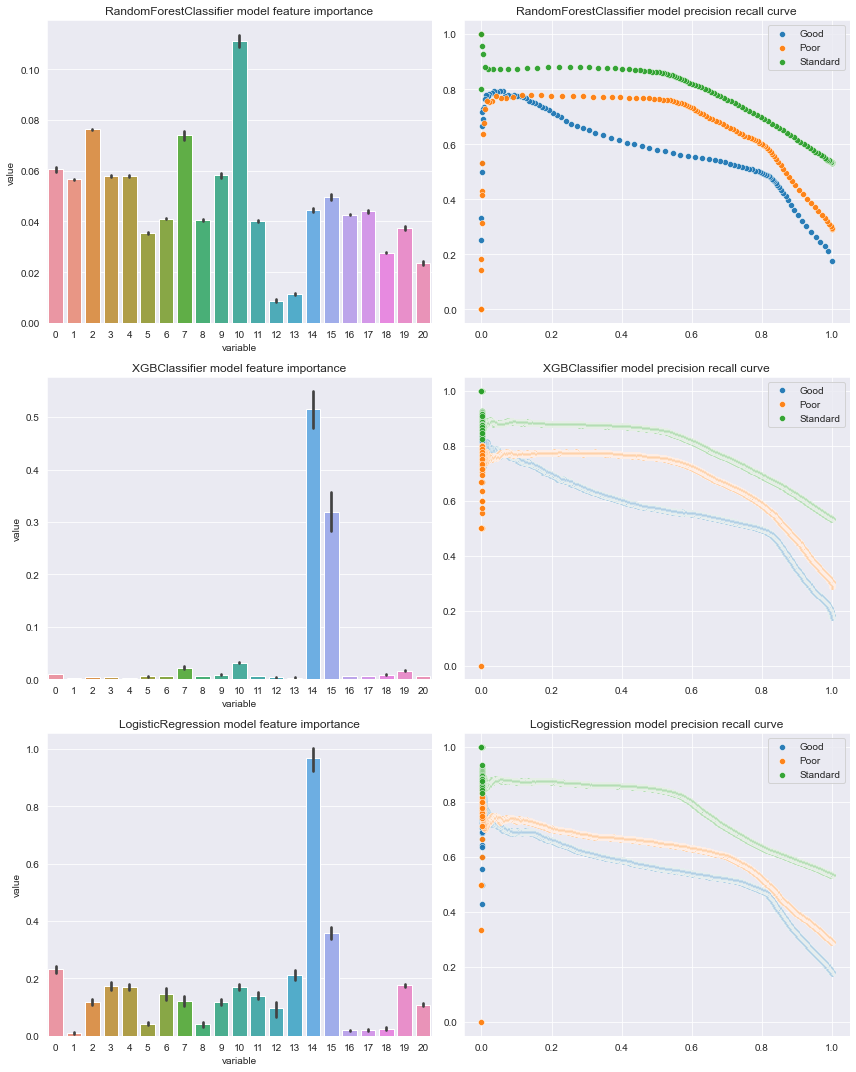

In [18]:
names,models=get_models()
fig,axes=plt.subplots(3,2,figsize=(12,15))
result={}

for i in range(len(models)):
    scores=[]
    importance=[]
    probability=[]
    
    for train_idx,val_idx in StratifiedKFold(n_splits=5).split(X,y):
        model=models[i].fit(X[train_idx,:],y[train_idx])
        y_pred=model.predict(X[val_idx,:])
        y_true=y[val_idx]
        score=f1_score(y_true,y_pred,average='macro')
        probability.append(model.predict_proba(X[val_idx,:]))
        scores.append(score)
        
        if i==2:
            importance.append(abs(model.coef_[0]))
            
        else:
            importance.append(model.feature_importances_)

        
    ax=axes[i,0]
    frame=pd.DataFrame(importance)
    result_p=pd.melt(frame,value_vars=frame.columns)
    sns.barplot(x="variable",y="value",data=result_p,ax=ax);
    ax.set_title(f"{names[i]} model feature importance")
        
    ax=axes[i,1]
    y_true=label_binarize(y,classes=range(len(label.classes_)))
    y_proba=np.concatenate([probability[j] for j in range(len(probability))])
    for k in range(len(label.classes_)):
        precision,recall,thresh=precision_recall_curve(y_true[:,k],y_proba[:,k])
        sns.scatterplot(x=recall, y=precision, alpha=0.95,ax=ax,label=label.classes_[k])
    ax.legend()
    ax.set_title(f"{names[i]} model precision recall curve")
            
    plt.tight_layout()
    result[names[i]]=scores

Aunque la curva de precision-recall es casi la misma para los tres clasificadores, diferentes features tienen diferente importancia para cada modelo, siendo el modelo XGBoost el que tiene una importancia de características notablemente distinta a los otros modelos. Esto indica que los modelos son diferentes y utilizar sus valores en un ensamblaje o apilamiento (stacking) podría mejorar el rendimiento. 

La curva de precisión-recall también nos muestra que las instancias de buen puntaje crediticio se clasifican incorrectamente con más frecuencia que las instancias de puntaje estándar y pobre (Poor). La clase de puntaje crediticio estándar es la que se clasifica incorrectamente en menor medida en los tres modelos.

Los modelos están teniendo un mejor rendimiento en las instancias estándar, pero un rendimiento deficiente en las instancias de buen y pobre puntaje crediticio. Esto puede ser debido al desequilibrio de clases. Por lo tanto, podemos utilizar técnicas de muestreo de datos, especialmente aquellas que aumenten las instancias de clases en áreas de límite o superposición.

#### 1.4 Ensemble (Ensamblaje)

In [19]:
xgb_params={"n_estimators": 319,
            "max_depth": 5,
            "learning_rate": 0.010320226911021985,
            "subsample": 0.41644521272647506,
            "colsample_bytree": 0.6465159042623695,
            "reg_lambda": 0.04479410490748427 }

rf_params={"n_estimators": 212,
           "max_depth": 8,
           "max_samples": 0.6391963650868431,
           "min_samples_split": 13,
           "max_features": "auto"}


In [20]:
models={"logisticRegression":LogisticRegression(random_state=42,n_jobs=-1),
        "XGBClassifier":XGBClassifier(**xgb_params,random_state=42,n_jobs=-1),
        "RandomForestClassifier":RandomForestClassifier(**rf_params,random_state=42,n_jobs=-1)}

In [21]:
probability=dict(zip(models.keys(),[[] for _ in range(len(models.keys()))]))

for train_idx,val_idx in StratifiedKFold(n_splits=5).split(X,y):
    X_train,y_train=X[train_idx,:],y[train_idx]
    X_val,y_val=X[val_idx,:],y[val_idx]
    for name,model in models.items():
        algo=model.fit(X_train,y_train)
        y_proba=algo.predict_proba(X[val_idx,:])
        probability[name].append(algo.predict_proba(X[val_idx,:]))

c:\Users\juani\.conda\envs\ficnenv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\juani\.conda\envs\ficnenv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\juani\.conda\envs\ficnenv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

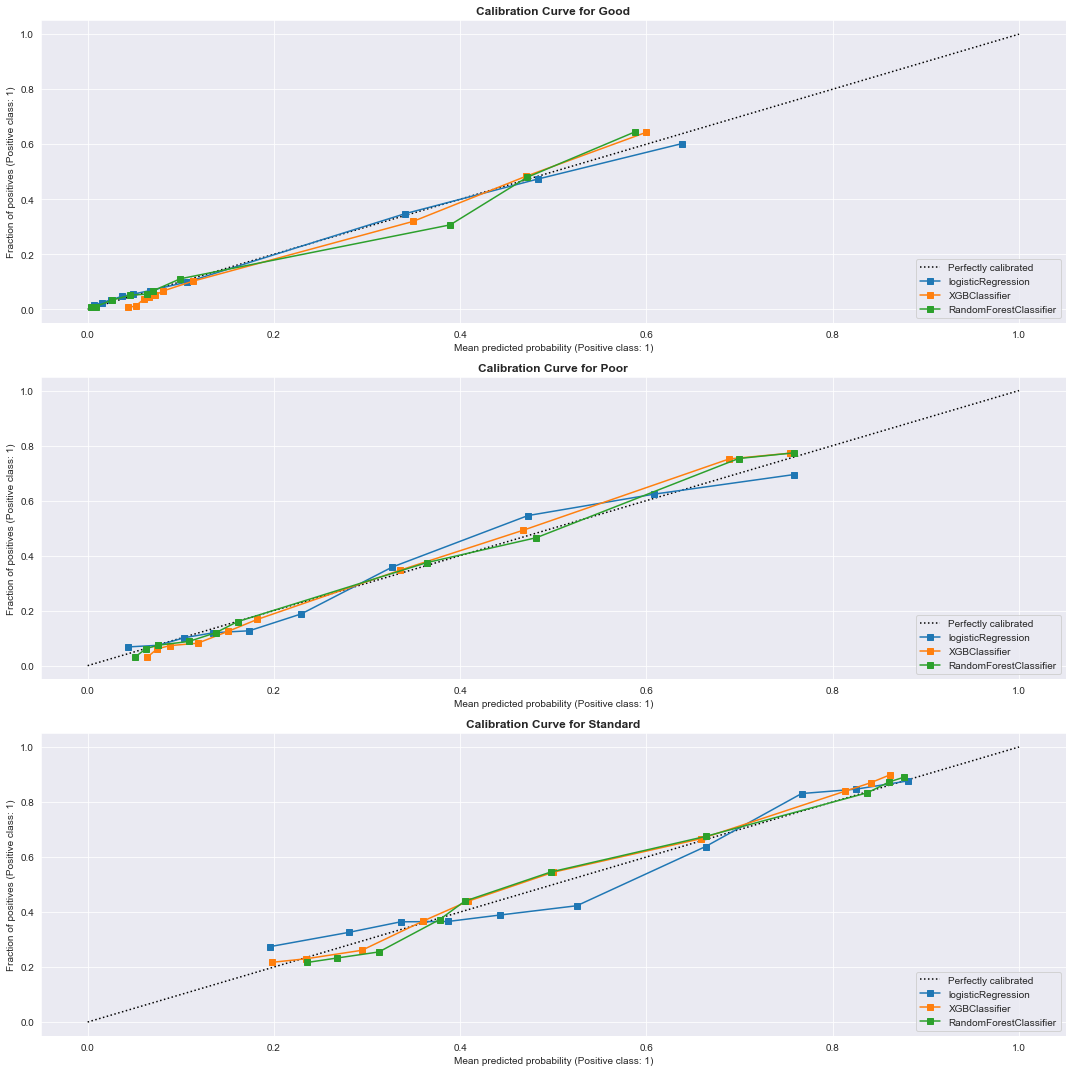

In [22]:
inter=probability.copy()
y_true=label_binarize(y,classes=range(len(label.classes_)))
probas=dict(zip(models.keys(),[[] for _ in range(len(models.keys()))]))
for name in models.keys():
    proba=np.concatenate([probability[name][i] for i in range(len(probability[name]))])
    probas[name].append(proba)
fig,axes=plt.subplots(3,1,figsize=(15,15))
ax=axes.flatten()

for i,classes in enumerate(list(label.classes_)):
    ax[i].set_title(f"Calibration Curve for {classes}",fontweight="bold")
    for name,prediction in probas.items():
        y_real=y_true[:,i]
        y_prob=probas[name][0][:,i]
        CalibrationDisplay.from_predictions(y_real,y_prob,n_bins=10, strategy='quantile',ax=ax[i],name=name);
        
plt.tight_layout()

Las probabilidades predichas por los modelos para cada clase en la variable objetivo están bien calibradas. Por lo tanto, no es necesario calibrar las probabilidades predichas.

In [25]:
probas["Average_Models"]=[np.add(probas["logisticRegression"][0],probas["XGBClassifier"][0])]
probas["Average_Models"]=[np.add(probas["Average_Models"][0],probas["logisticRegression"][0])/3]

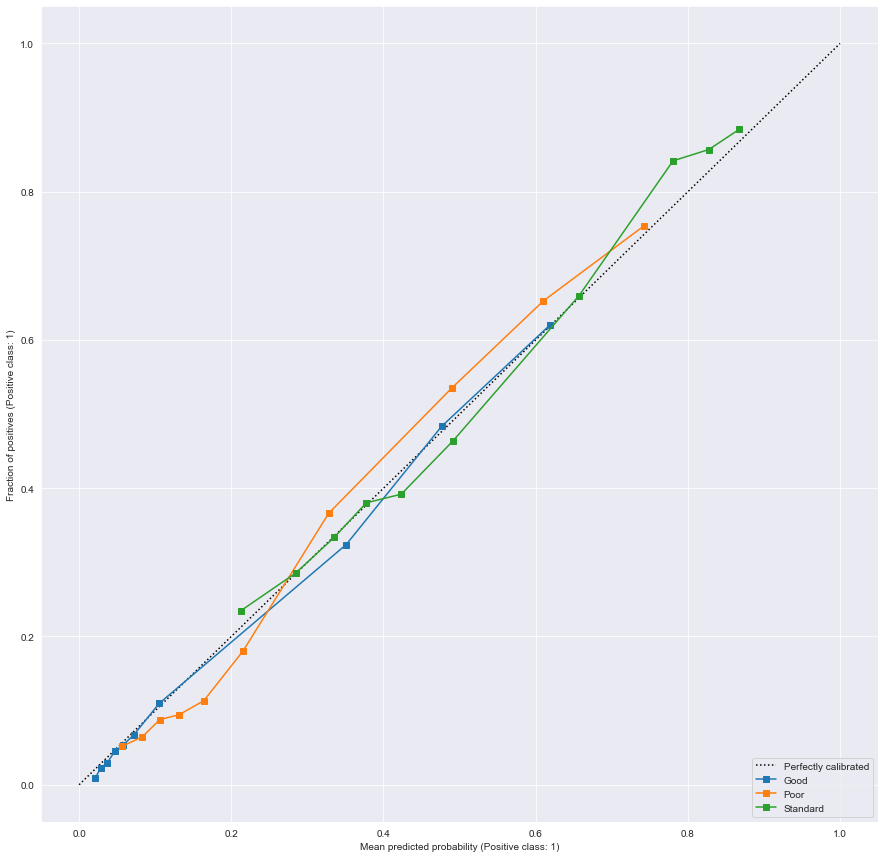

In [26]:
plt.figure(figsize=(15,15))
axes=plt.subplot(1,1,1)

for i,classes in enumerate(list(label.classes_)):
    y_real=y_true[:,i]
    y_prob=probas["Average_Models"][0][:,i]
    CalibrationDisplay.from_predictions(y_real,y_prob,n_bins=10, strategy='quantile',name=classes,ax=axes);

In [27]:
for models in probas.keys():
    sol=np.argmax(probas[models][0],axis=1)
    score=f1_score(y,sol,average="macro")
    print(f"\n{models} f1 score is: {score}")


logisticRegression f1 score is: 0.6221659180783733

XGBClassifier f1 score is: 0.6760580969008642

RandomForestClassifier f1 score is: 0.6747353472592232

Average_Models f1 score is: 0.6506157295014584


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KO: No timezone found, symbol may be delisted


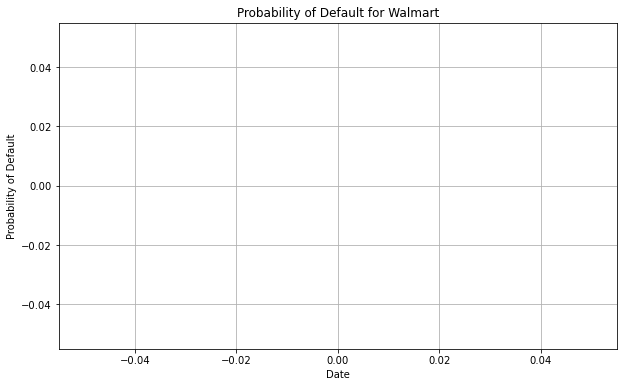

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import norm
#Importamos las librerias necesarias
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import yfinance as yf

def merton_model(V, E, sigma_V, sigma_E, rho):
    """
    Implements the Merton model for default risk estimation.

    Args:
        V (float): Market value of the firm's assets.
        E (float): Firm's debt or liabilities.
        sigma_V (float): Standard deviation of the firm's asset value.
        sigma_E (float): Standard deviation of the firm's debt.
        rho (float): Correlation coefficient between the asset value and debt.

    Returns:
        default_prob (float): Probability of default.
    """
    d1 = (np.log(V / E) + (0.5 * (sigma_V**2 - sigma_E**2) * T)) / (sigma_V * np.sqrt(T))
    d2 = d1 - sigma_V * np.sqrt(T)

    default_prob = 1 - norm.cdf(d2)

    return default_prob

# Fetch Walmart stock price data from Yahoo Finance
ticker = "KO"
start_date = "2022-01-01"
end_date = "2022-12-31"
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns and standard deviation
data['Return'] = data['Adj Close'].pct_change()
sigma_V = data['Return'].std() * np.sqrt(252)  # Annualized standard deviation of asset value

# Set model parameters
E = 1000000000  # Example debt value
sigma_E = 0.3  # Example standard deviation of debt
rho = 0.5  # Example correlation coefficient
T = 1  # Time horizon in years

# Calculate probability of default for each day
data['Default Probability'] = merton_model(data['Adj Close']*1000000000, E, sigma_V, sigma_E, rho)

# Plot probability of default over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Default Probability'])
plt.title("Probability of Default for Walmart")
plt.xlabel("Date")
plt.ylabel("Probability of Default")
plt.grid(True)
plt.show()


In [4]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org yfinance

  Using cached yfinance-0.2.18-py2.py3-none-any.whl (60 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.3.8-cp39-cp39-win_amd64.whl (35 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached lxml-4.9.2-cp39-cp39-win_amd64.whl (3.9 MB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [4]:
!pip uninstall yfinance

^C
